# OncoKB annotator

Created: **26/07/18**  
Last modified: **01/08/18**

**Goal:** annotate the filtered dataset obtained at the end of `first_analysis.ipynb` (01/08/18 version) with [oncokb-annotator](https://github.com/oncokb/oncokb-annotator).

**Refs:**
* `first_analysis.ipynb` [Pierre]
* `custom_tools.R` [Pierre]
***

In [2]:
source("../src/utils/custom_tools.R") # custom tools functions made on purpose
setup_environment()

In [5]:
impact <- get_cleaned_impact(".")

The oncokb-annotator needs a `Variant_Classification` feature, which can be computed from the `Consequence` feature with the following function:

In [16]:
get_variant_classification <- function(Consequence) {
    Variant_Classification = c("Nonsense_Mutation", 
                               "Splice_Site",
                               "Missense_Mutation",
                               "In_Frame_Ins",
                               "In_Frame_Del",
                               "Frame_Shift_Ins",
                               "Frame_Shift_Del",
                               "Silent")
    
    return (Variant_Classification[match(Consequence, selected_mutation_types)])
}

data.frame(selected_mutation_types, get_variant_classification(selected_mutation_types)) 

selected_mutation_types,get_variant_classification.selected_mutation_types.
stopgain_SNV,Nonsense_Mutation
splicing,Splice_Site
nonsynonymous_SNV,Missense_Mutation
nonframeshift_insertion,In_Frame_Ins
nonframeshift_deletion,In_Frame_Del
frameshift_insertion,Frame_Shift_Ins
frameshift_deletion,Frame_Shift_Del
synonymous_SNV,Silent


In [17]:
impact$Variant_Classification <- sapply(impact$Consequence, get_variant_classification)

In [18]:
write.table(impact, "data/selected_IMPACT_mutations_180508.txt", sep = "\t", row.names = FALSE)

Then we follow the steps:
* Clone the repository at https://github.com/oncokb/oncokb-annotator in the folder containing the current repository:
```bash
$ git clone https://github.com/oncokb/oncokb-annotator.git
```

* Create a python2.7 virtualenv named `oncokb-annotator`:
```bash
mkvirtualenv --python=python2.7 oncokb-annotator
```

* Execute the following command in the current repository (inside a python=2.6.9 conda environment for example):
```bash
$ bsub -I -We 59 -R select[internet] 'python oncokb-annotator/MafAnnotator.py -i "data/selected_IMPACT_mutations_180508.txt" -o "data/selected_IMPACT_mutations_180508_oncokb_annotator.txt"'
```
The CPU time used on the cluster was 425.2 seconds.  
The output file `selected_IMPACT_mutations_180508_oncokb_annotator.txt` is the annotated version.

In [19]:
impact_oncokb <- read.table("data/selected_IMPACT_mutations_180508_oncokb_annotator.txt",
                            sep = "\t", stringsAsFactors = FALSE, header = TRUE)
nrow(impact_oncokb)

[1] 248502


                       Likely Oncogenic           Oncogenic Predicted Oncogenic 
             180896               47613               16237                2848 
       Inconclusive      Likely Neutral                 Sum 
                524                 384              248502 

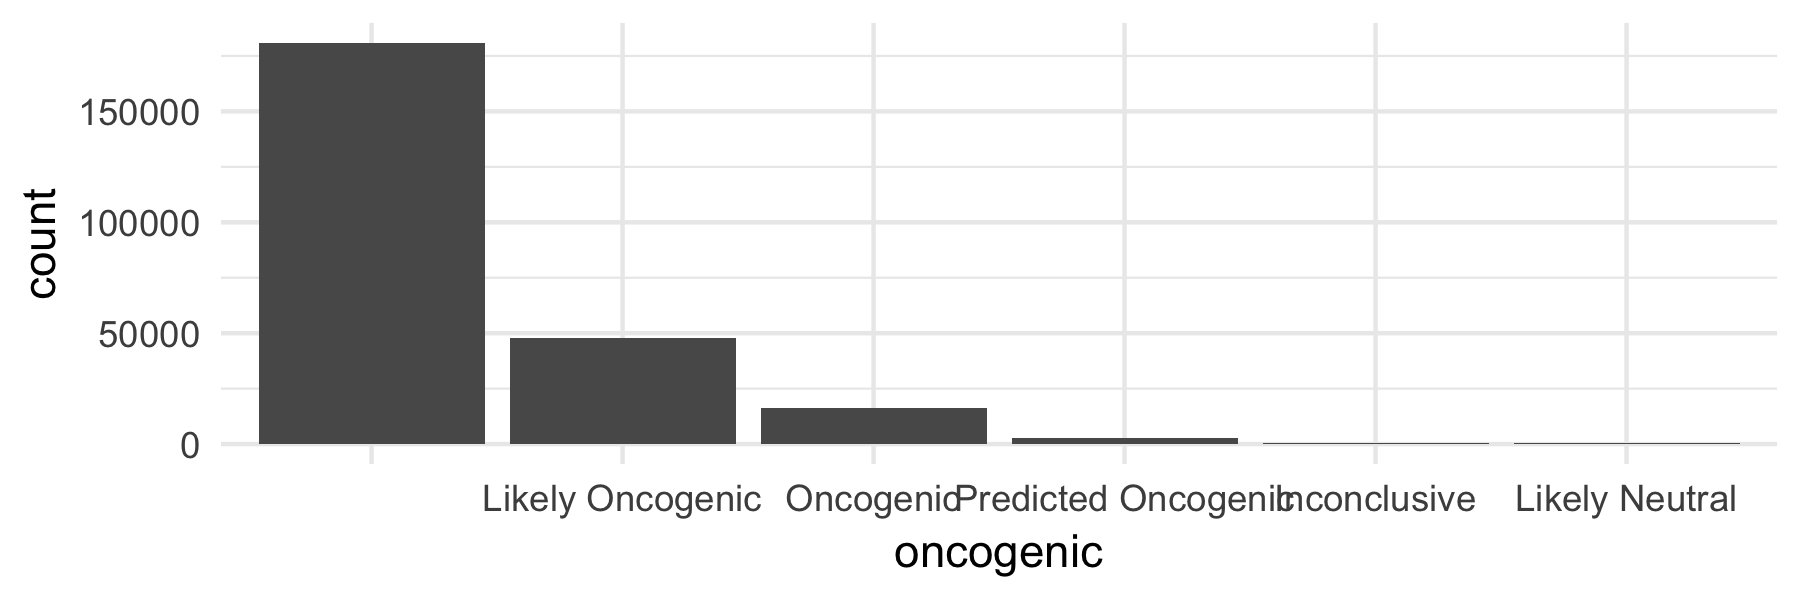

In [20]:
impact_oncokb <- sort_histogram(impact_oncokb, "oncogenic")
addmargins(table(impact_oncokb$oncogenic))
notebook_plot_size(6, 2)
ggplot(impact_oncokb) + geom_bar(aes(oncogenic))